# Multi-Thresholder usando Otsu

## Introdução:
Este notebook apresenta um exemplo de implementação de um algoritmo de limiarização multi-thresholding usando o método de Otsu. O método de Otsu é uma técnica popular para encontrar automaticamente um limite de limiar ótimo em uma imagem em escala de cinza, de forma a separar as regiões de interesse em classes distintas. A extensão para cálculo de múltiplos thresholds permitirá a segmentação em várias classes.

## Importação das bibliotecas:
Vamos começar importando as bibliotecas necessárias para a implementação do algoritmo.

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Função otsu_multi_threshold:
A primeira função que vamos implementar é a otsu_multi_threshold. Essa função recebe uma imagem e o número de thresholds desejado (n_thresholds) e retorna uma lista contendo os valores dos thresholds encontrados.

In [24]:
def otsu_multi_threshold(image, n_thresholds):
    # Convert the image to grayscale if it is not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate histogram and total number of pixels
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    total_pixels = image.shape[0] * image.shape[1]

    # Calculate cumulative sum
    cum_sum = np.cumsum(hist)

    thresholds = []
    for t in range(1, n_thresholds + 1):
        max_variance = 0
        threshold = 0

        for i in range(1, 256):
            w1 = cum_sum[i - 1] / total_pixels
            w2 = (total_pixels - cum_sum[i - 1]) / total_pixels
            if w1 == 0 or w2 == 0:
                continue

            mean1 = cum_sum[i - 1] / (w1 * total_pixels)
            mean2 = (cum_sum[-1] - cum_sum[i - 1]) / (w2 * total_pixels)

            variance = w1 * w2 * ((mean1 - mean2)**2)

            if variance > max_variance:
                max_variance = variance
                threshold = i

        thresholds.append(threshold)
        hist[:threshold] = 0

    return thresholds

## Função apply_multi_threshold:
A segunda função é a apply_multi_threshold, que recebe uma imagem e a lista de thresholds e retorna uma nova imagem segmentada de acordo com os thresholds fornecidos.

In [25]:
def apply_multi_threshold(image, thresholds):
    # Convert the image to grayscale if it is not already
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    result = np.zeros_like(image)

    for i in range(len(thresholds)):
        lower = thresholds[i]
        upper = thresholds[i + 1] if i + 1 < len(thresholds) else 256  # Adjust the upper value for the last interval
        result[(lower <= image) & (image < upper)] = (lower + upper - 1) // 2

    return result

## Aplicação:
A seguir, vamos aplicar o algoritmo nas imagens de um diretório "data/original_images/" e salvar as imagens segmentadas no diretório "data/segmented_images/". Também vamos plotar as imagens originais e segmentadas, juntamente com seus histogramas.

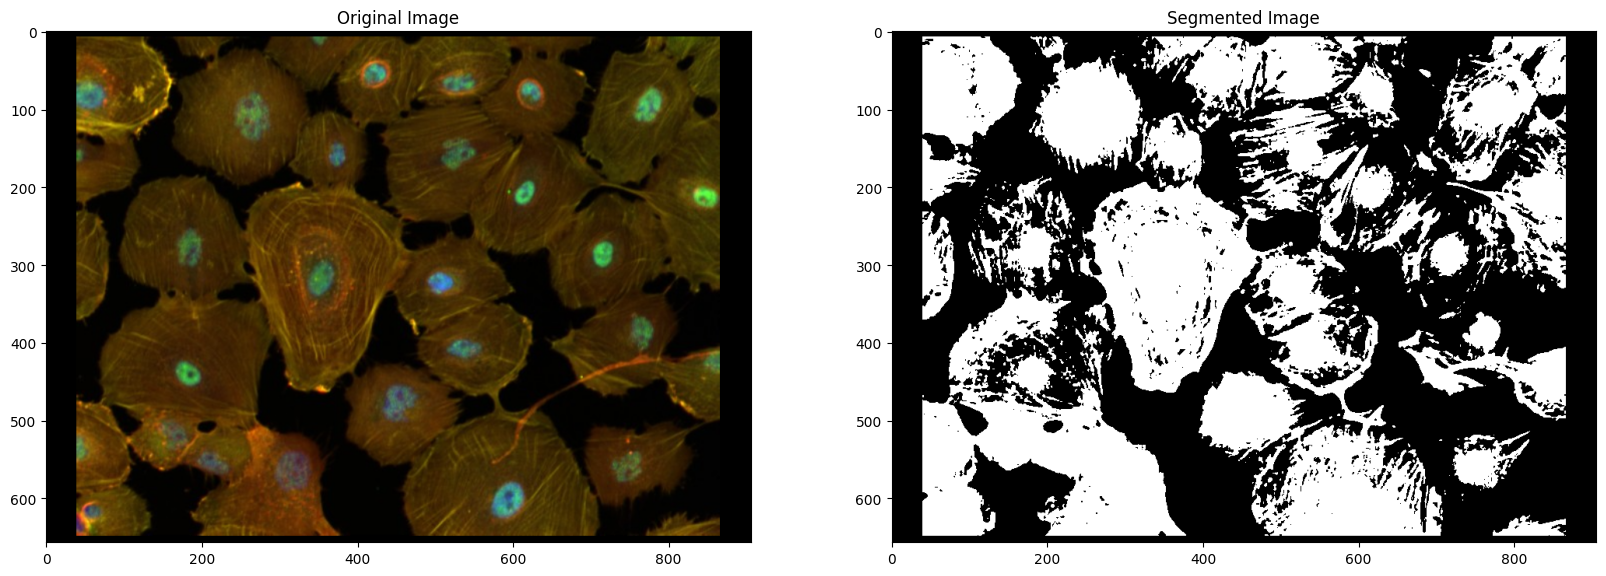

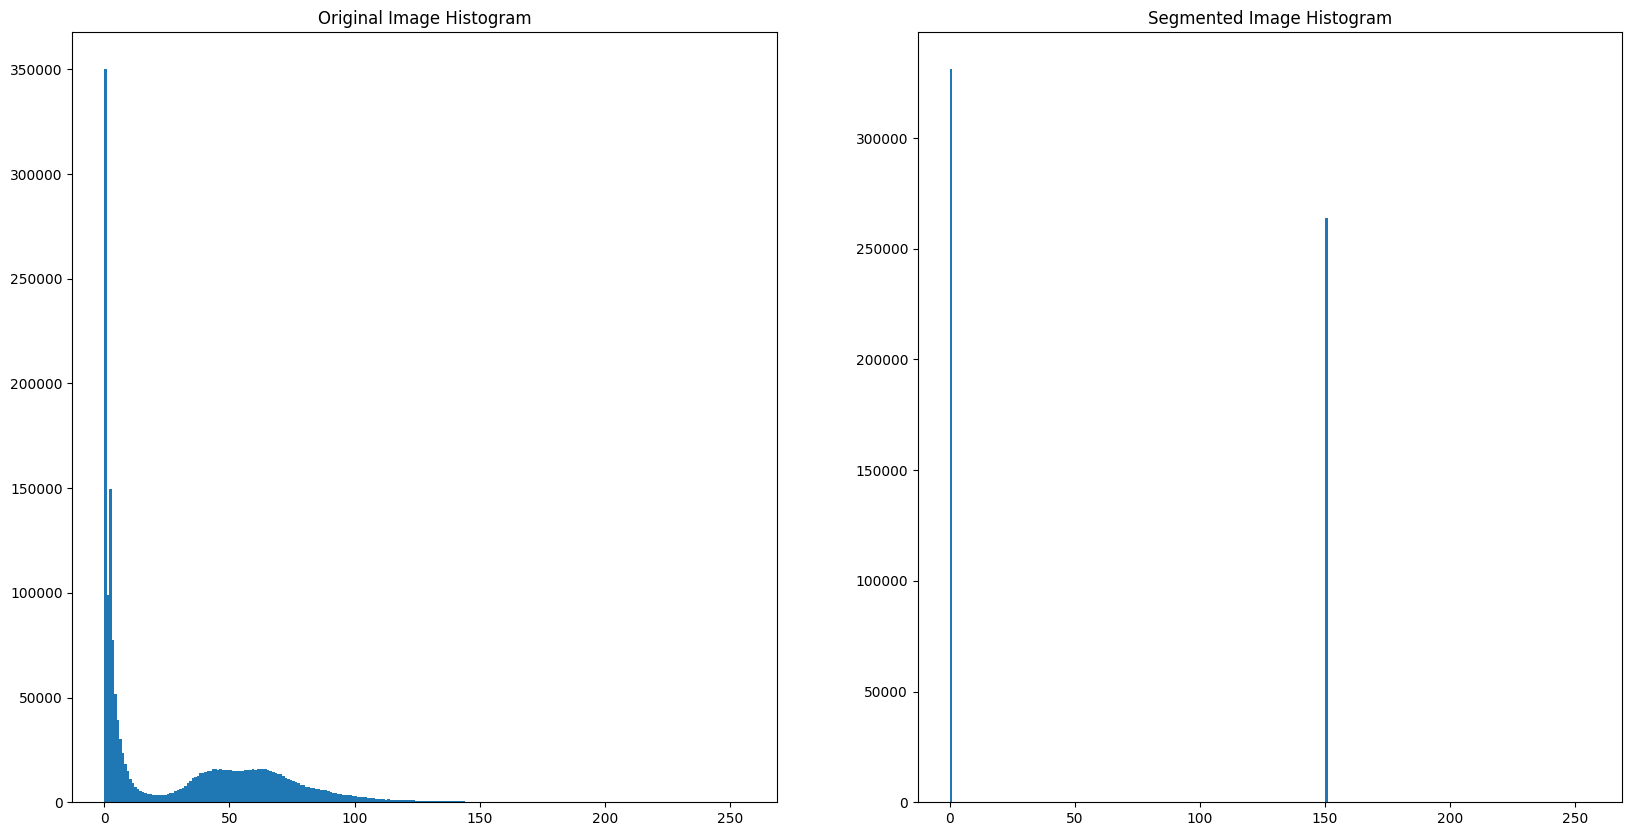

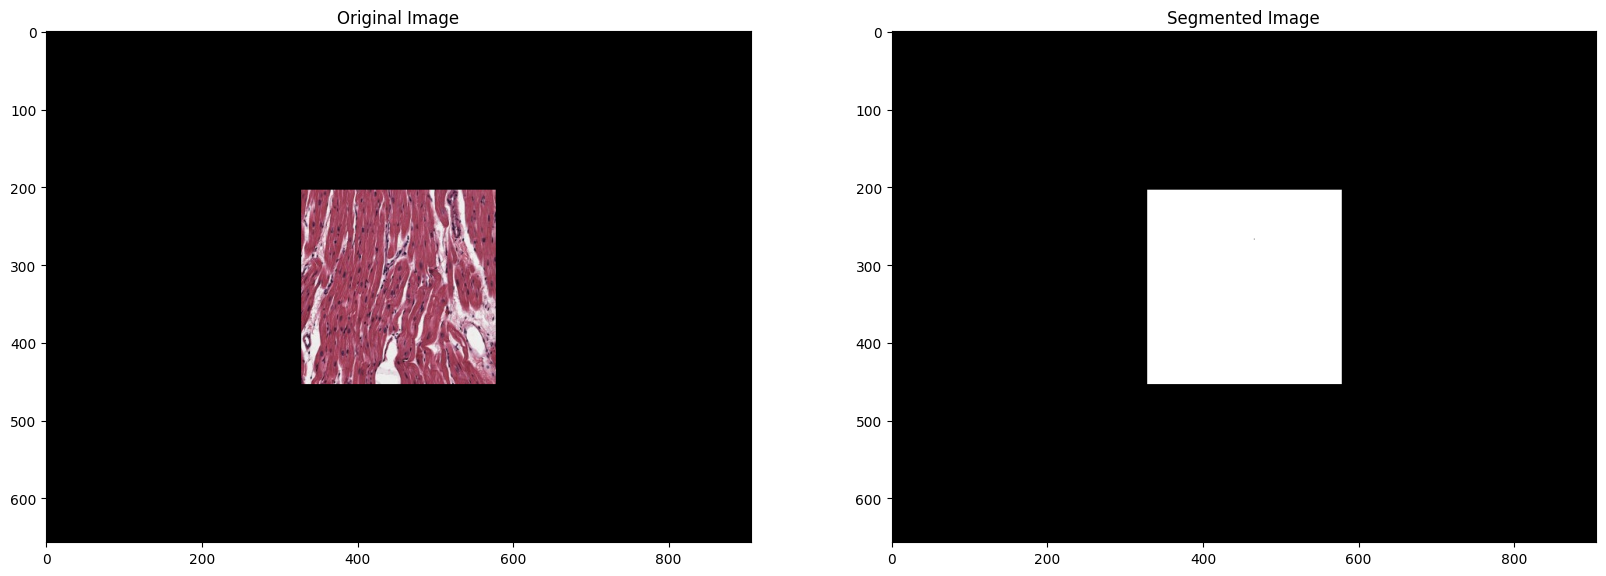

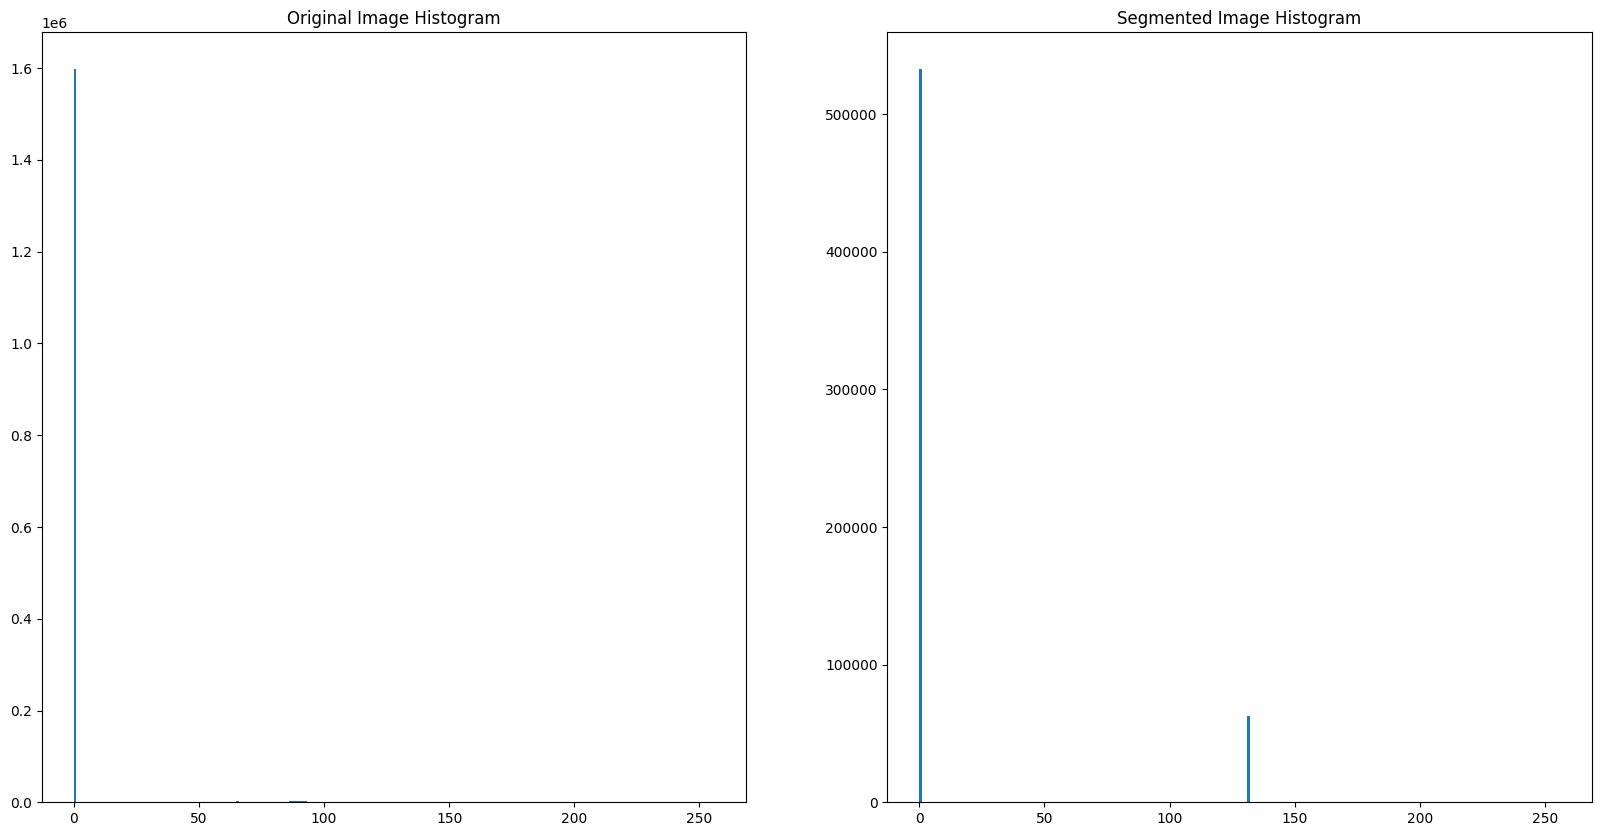

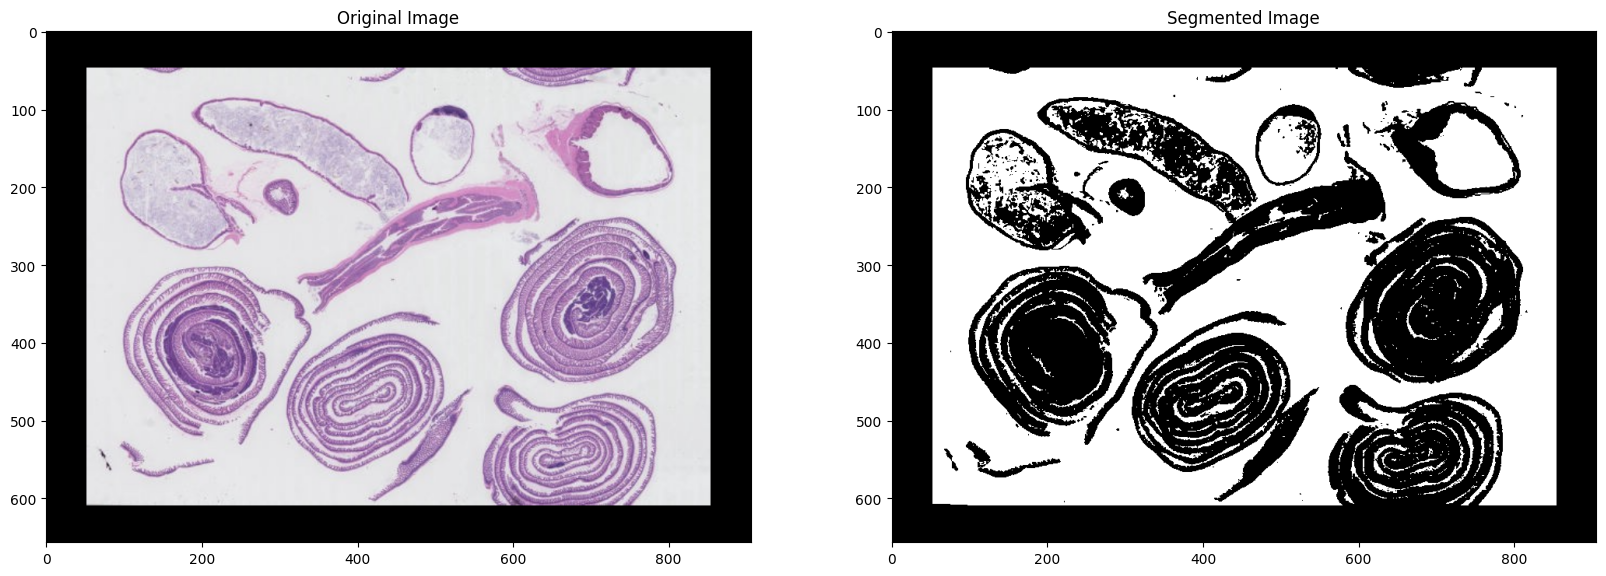

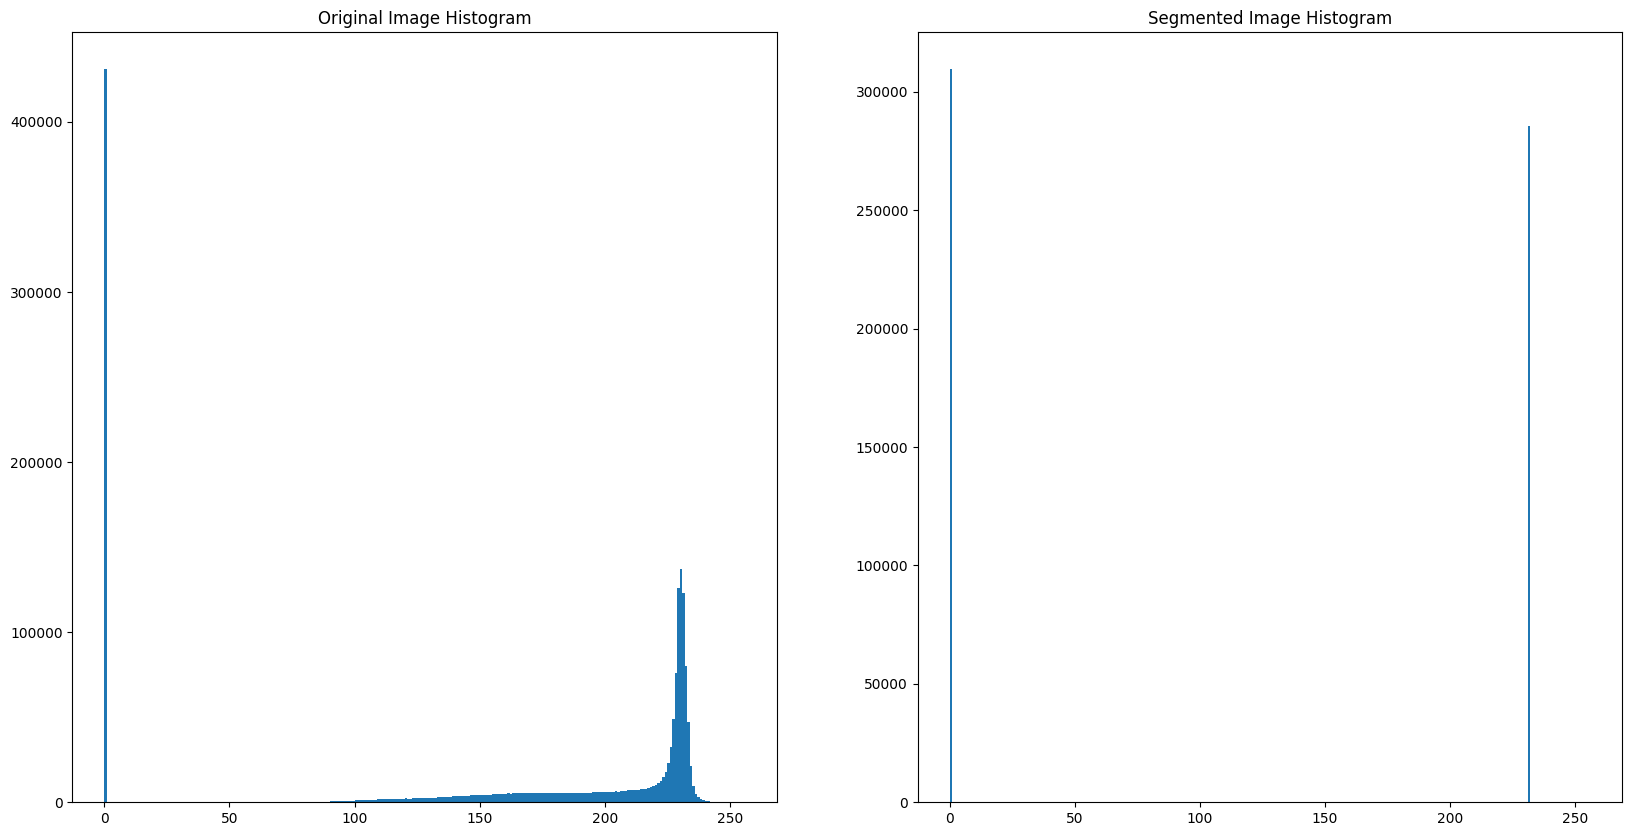

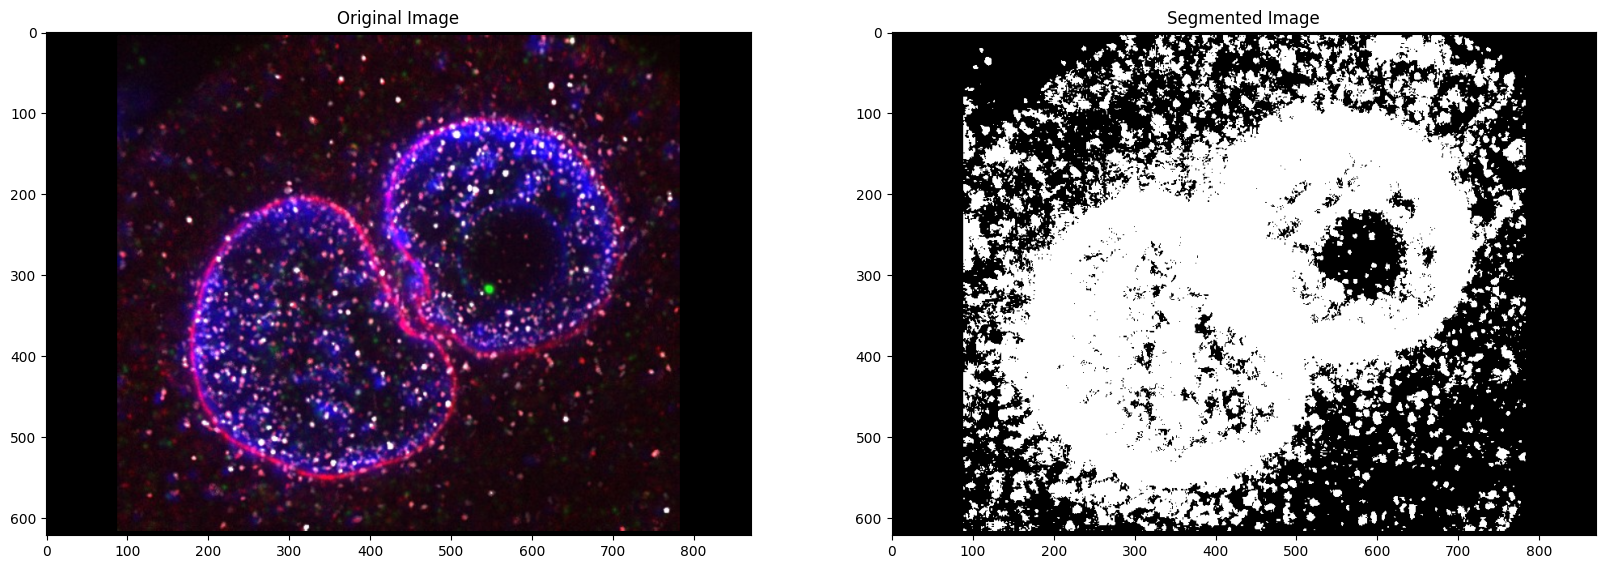

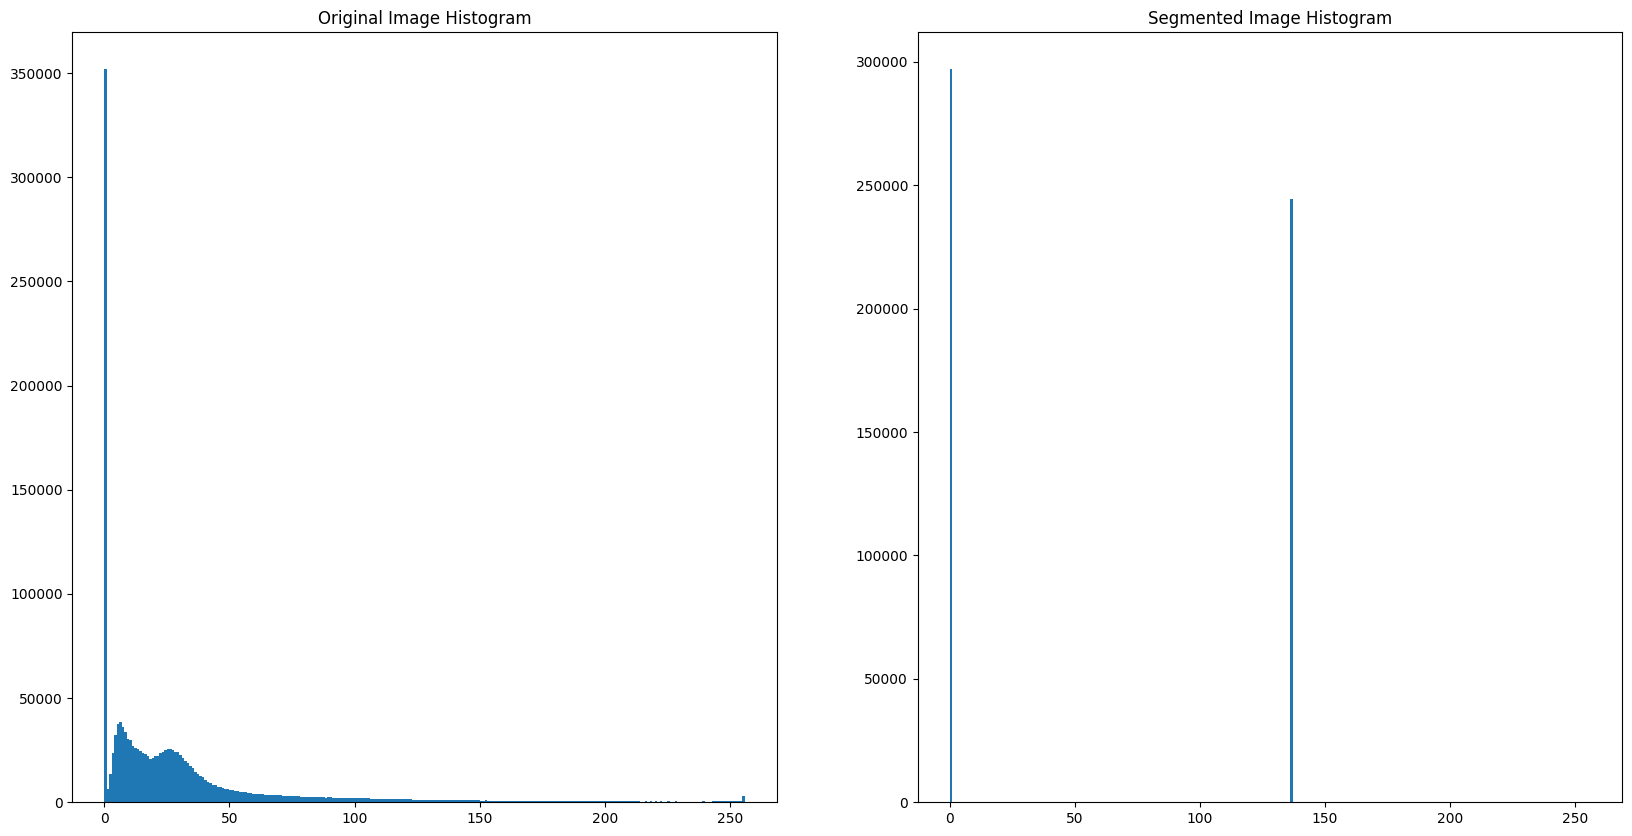

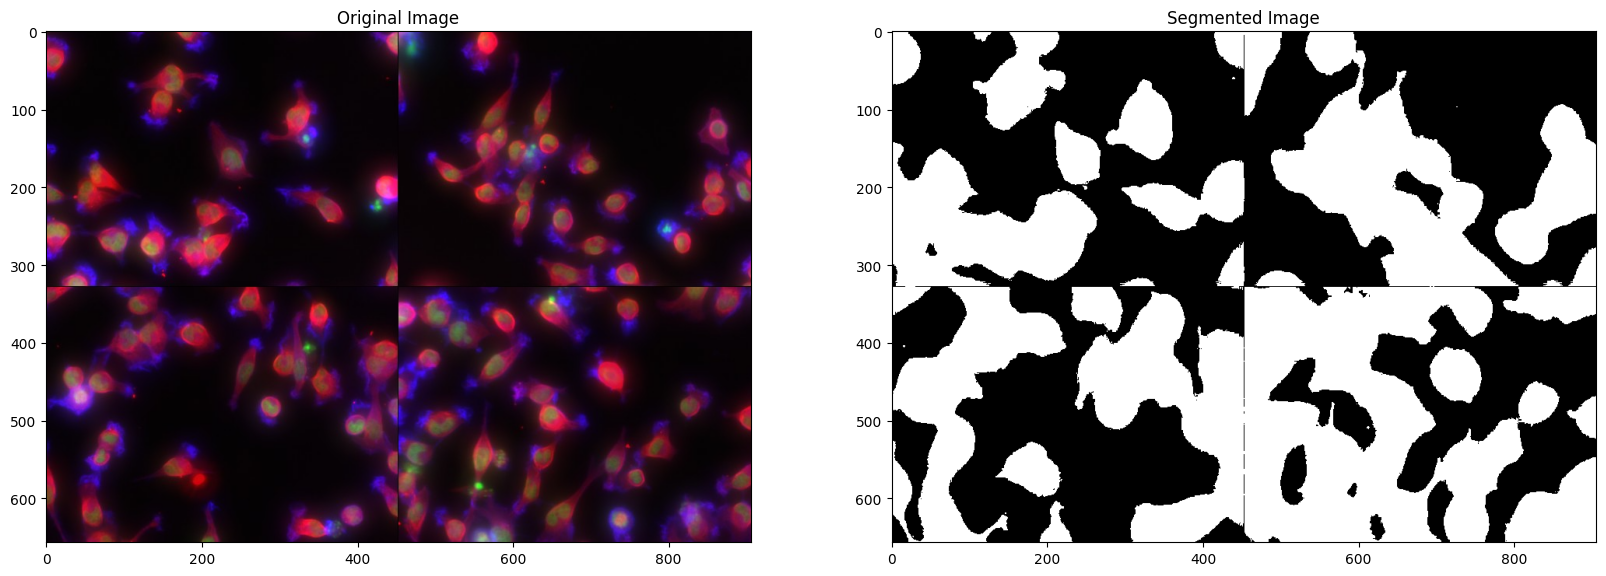

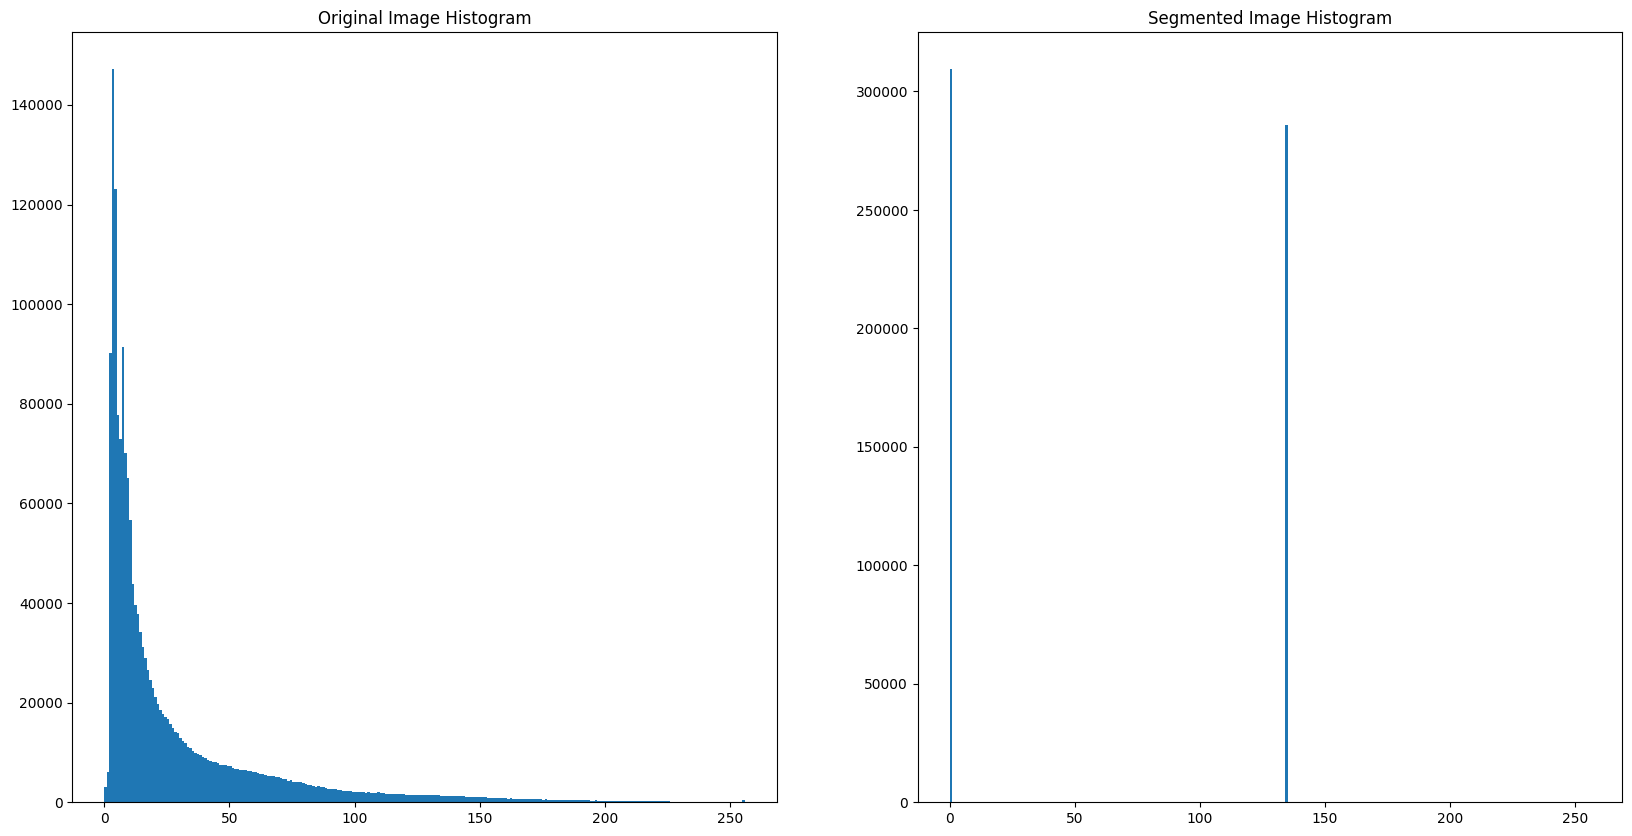

In [28]:
if __name__ == "__main__":
  folder = "./data/original_images/"
  for filename in os.listdir(folder):
      img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_COLOR)
      if img is not None:
          n_thresholds = 2 #@param { type: "slider", min: 2, max: 10, step: 1}
          thresholds = otsu_multi_threshold(img, n_thresholds)
          segmented_image = apply_multi_threshold(img, thresholds)
          cv2.imwrite("./data/segmented_images/" + filename, segmented_image)
          # Plot
          plt.figure(figsize=(20, 20))
          plt.subplot(1, 2, 1)
          img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
          plt.imshow(img)
          plt.title("Original Image")
          plt.subplot(1, 2, 2)
          plt.imshow(segmented_image, cmap="gray")
          plt.title("Segmented Image")
          plt.show()

          # Plot histogram
          plt.figure(figsize=(20, 10))
          plt.subplot(1, 2, 1)
          plt.hist(img.ravel(), 256, [0, 256])
          plt.title("Original Image Histogram")
          plt.subplot(1, 2, 2)
          plt.hist(segmented_image.ravel(), 256, [0, 256])
          plt.title("Segmented Image Histogram")
          plt.show()

## Conclusão:
Neste notebook, implementamos um algoritmo de limiarização multi-thresholding usando o método de Otsu. Exploramos duas funções, otsu_multi_threshold e apply_multi_threshold, que permitem calcular múltiplos thresholds e aplicar a segmentação em uma imagem. Em seguida, aplicamos o algoritmo em um conjunto de imagens e visualizamos os resultados e seus histogramas. O método de Otsu é uma ferramenta poderosa para segmentar imagens com base na otimização da variância entre as classes e pode ser adaptado para aplicações específicas, como detecção de objetos e análise de regiões de interesse.